In [68]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [69]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [70]:
NUM_CLASSES = 5

# Dataset reading

In [71]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [72]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [75]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_8 (Dropout)         (None, 42)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                860       
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                210       
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [77]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [78]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/30 [>.............................] - ETA: 8s - loss: 1.6619 - accuracy: 0.2344
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 1.5718 - accuracy: 0.2655 - val_loss: 1.4797 - val_accuracy: 0.3046
Epoch 2/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.4894 - accuracy: 0.3203
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.4612 - accuracy: 0.3281 - val_loss: 1.3790 - val_accuracy: 0.4874
Epoch 3/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.4393 - accuracy: 0.3125
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.3789 - accuracy: 0.3831 - val_loss: 1.2789 - val_accuracy: 0.5958
Epoch 4/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.3337 - accuracy: 0.4297
E

/Users/papeibrahimadiawara/hand-gesture-recognition-mediapipe/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.2648 - accuracy: 0.4595 - val_loss: 1.1030 - val_accuracy: 0.6429
Epoch 6/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.3609 - accuracy: 0.3125
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.2058 - accuracy: 0.4857 - val_loss: 1.0254 - val_accuracy: 0.6562
Epoch 7/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.1661 - accuracy: 0.4844
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.1619 - accuracy: 0.5030 - val_loss: 0.9604 - val_accuracy: 0.6703
Epoch 8/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.0777 - accuracy: 0.5781
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [=============

In [79]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 732us/step - loss: 0.2587 - accuracy: 0.9403


In [80]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [81]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 35ms/step
[8.2314265e-01 4.6547025e-02 4.8406352e-03 6.7483583e-05 1.2540224e-01]
0


# Confusion matrix

40/40 [==============================] - 0s 470us/step


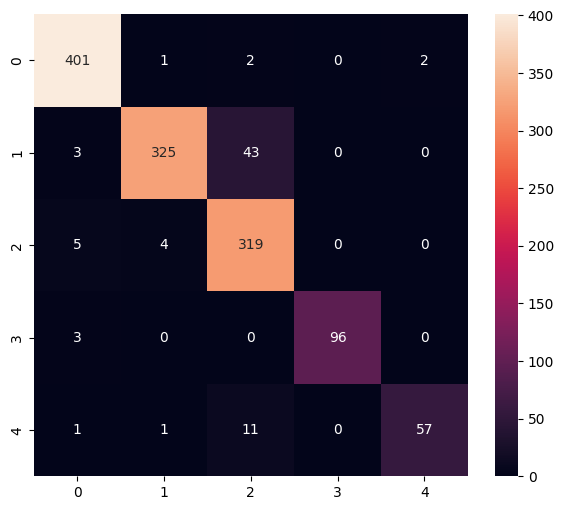

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       406
           1       0.98      0.88      0.93       371
           2       0.85      0.97      0.91       328
           3       1.00      0.97      0.98        99
           4       0.97      0.81      0.88        70

    accuracy                           0.94      1274
   macro avg       0.95      0.92      0.94      1274
weighted avg       0.95      0.94      0.94      1274



In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [83]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/Users/papeibrahimadiawara/hand-gesture-recognition-mediapipe/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/j2/_zwt4kzs22z83gqyq77m8cp80000gn/T/tmpusk6g2lp/assets


INFO:tensorflow:Assets written to: /var/folders/j2/_zwt4kzs22z83gqyq77m8cp80000gn/T/tmpusk6g2lp/assets
2023-11-30 18:04:34.454592: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-11-30 18:04:34.454756: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-11-30 18:04:34.455606: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/j2/_zwt4kzs22z83gqyq77m8cp80000gn/T/tmpusk6g2lp
2023-11-30 18:04:34.456475: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-11-30 18:04:34.456481: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/j2/_zwt4kzs22z83gqyq77m8cp80000gn/T/tmpusk6g2lp
2023-11-30 18:04:34.460279: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-11-30 18:04:34.500352: I tensorflow/cc/saved_model/loader.cc:217] Running initialization

6664

# Inference test

In [85]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [86]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [87]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [88]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 461 µs, sys: 724 µs, total: 1.19 ms
Wall time: 1.04 ms


In [89]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.2314271e-01 4.6546996e-02 4.8406306e-03 6.7483466e-05 1.2540220e-01]
0
